# Problem Statement( Crime Data) Clustering 

# Import Necessary Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.preprocessing import scale
from numpy import random,float,array 
import warnings
warnings.filterwarnings('ignore')


/var/folders/t7/b9vt3nmd5rl57fgrvllt9jgm0000gn/T/ipykernel_15908/3816988416.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random,float,array


# Import Data 

In [4]:
crime=pd.read_csv('/Users/viswanathareddy/Assignments /Clustering /crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Data Understanding 

In [5]:
crime.shape

(50, 5)

In [6]:
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [14]:
df_norm=norm_func(crime.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [17]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [18]:
z=linkage(df_norm,method="complete",metric="euclidean")

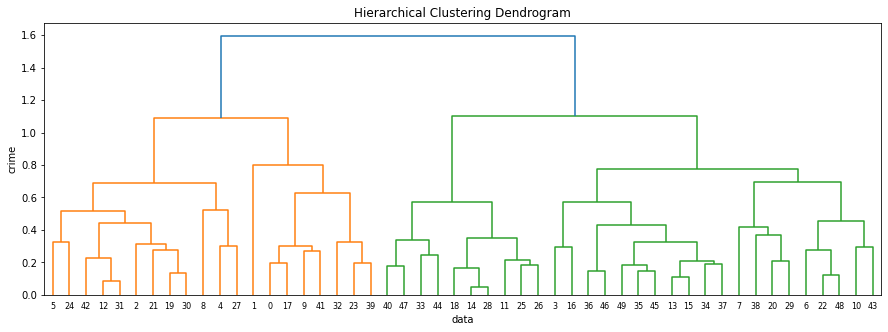

In [19]:
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('data')
plt.ylabel('crime')
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.,)
plt.show()

In [20]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:]))
crime_subset

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


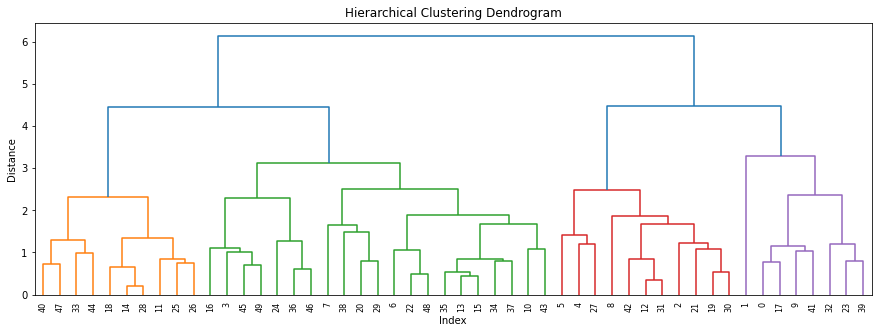

In [25]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # For creating dendrogram 
#p =np.array(df_norm) #Converting into numpy array format 
z=linkage(crime_subset,method="complete",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
        z,
       #Leaf_rotation =0., # rotates the x axis labels
       #leaf_font_size=8., # font size for the x axis labels 
)
plt.show()

In [27]:
k=list(range(2,5))

In [29]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
import numpy as np 

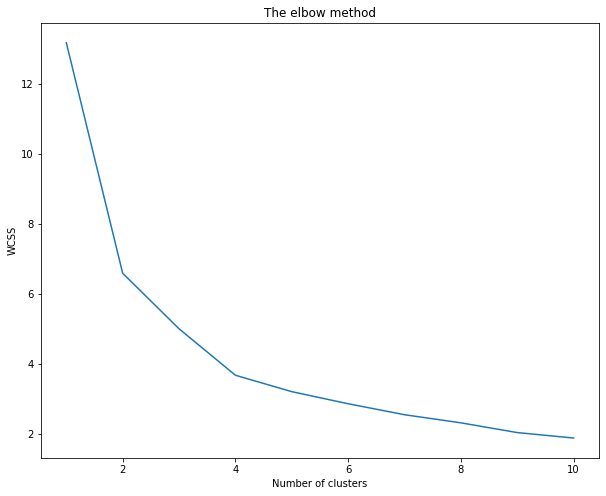

In [31]:
from sklearn.cluster import KMeans
fig =plt.figure(figsize=(10,8))
WCSS =[]
for i in range (1,11):
     clf = KMeans(n_clusters=i)
     clf.fit(df_norm)
     WCSS.append(clf.inertia_) # Inertia is another name for WCSS
plt.plot(range(1,11),WCSS)
plt.title('The elbow method')
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.show()

In [32]:
clf =KMeans(n_clusters=5)
y_kmeans =clf.fit_predict(df_norm)

In [33]:
y_kmeans
#clf.clster_centers_
clf.labels_

array([0, 3, 3, 2, 3, 3, 1, 2, 3, 0, 1, 4, 3, 2, 4, 2, 2, 0, 4, 3, 1, 3,
       4, 0, 2, 2, 2, 3, 4, 1, 3, 3, 0, 4, 1, 2, 2, 1, 1, 0, 4, 0, 3, 1,
       4, 2, 1, 4, 4, 2], dtype=int32)

In [35]:
md=pd.Series(y_kmeans) #converting numpy array into pandas series object
crime['clust']=md #creading a new column and assigning it to new column 
crime.describe()

,Murder,Assault,UrbanPop,Rape,clust
count,50.00000,50.000000,50.000000,50.000000,50.00000
mean,7.78800,170.760000,65.540000,21.232000,2.18000
std,4.35551,83.337661,14.474763,9.366385,1.33539
min,0.80000,45.000000,32.000000,7.300000,0.00000
25%,4.07500,109.000000,54.500000,15.075000,1.00000
50%,7.25000,159.000000,66.000000,20.100000,2.00000
75%,11.25000,249.000000,77.750000,26.175000,3.00000
max,17.40000,337.000000,91.000000,46.000000,4.00000


In [36]:
crime.iloc[:,1:7].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,14.671429,251.285714,54.285714,21.685714,0.0
1,4.955556,125.444444,80.111111,17.788889,1.0
2,6.975000,148.416667,62.333333,19.775000,2.0
3,10.966667,264.000000,76.500000,33.608333,3.0
4,2.680000,70.100000,51.000000,10.910000,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

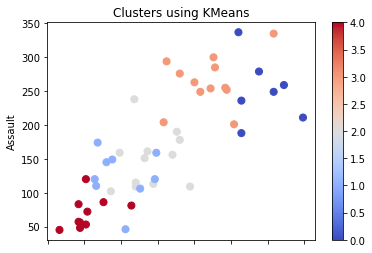

In [38]:
crime.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Cluaters using Kmeans')

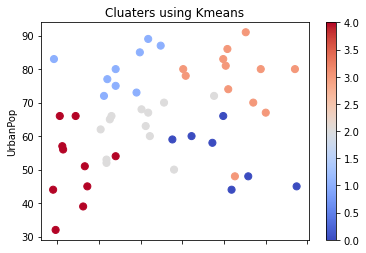

In [39]:
crime.plot(x='Assault',y='UrbanPop',c=clf.labels_,kind='scatter',s=50,cmap=plt.cm.coolwarm)
plt.title('Cluaters using Kmeans')

Text(0.5, 1.0, 'Clusters using KMeans')

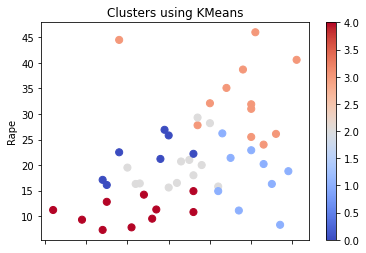

In [41]:
crime.plot(x ="UrbanPop",y="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

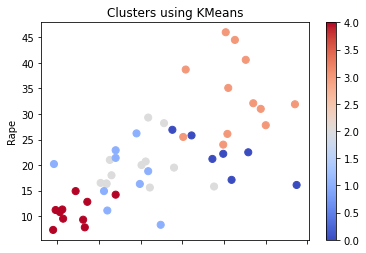

In [42]:
crime.plot(x ="Assault",y="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [43]:
clf.inertia_

3.1831577316766535

In [44]:
WCSS

[13.184122550256445,
 6.596893867946197,
 5.010878493006418,
 3.6834561535859134,
 3.214671780209886,
 2.869277430100004,
 2.5554781248326335,
 2.3240579857248083,
 2.045626587255869,
 1.8896037075872092]